<a href="https://colab.research.google.com/github/AzizahBsyrh/PraktikSVM_FSD/blob/main/Praktik_SVM_FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktik: Klasifikasi Data dengan Support Vector Machine(SVM) di Python**

Nama:
1.   Nur Azizah Basyirah Syamsuddin (24523238)
2.   Naila Reyhantyas Nurkhalisha (24523050)

In [222]:
#Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

**1. Pemilihan Dataset Klasifikasi**

Kami menggunakan dataset Iris Species dari Kaggle:

Link: https://www.kaggle.com/datasets/uciml/iris

Dataset ini berisi 150 sampel bunga iris dengan empat fitur numerik:


*   Sepal Length
*   Sepal Width
*   Petal Length
*   Petal Width

Label klasifikasi terdiri atas tiga kelas, yaitu: Iris-setosa, Iris-versicolor, Iris-virginica

In [223]:
df = pd.read_csv("Iris.csv")

**2. Preprocessing Data**

In [224]:
#Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Dataset Iris tidak memiliki missing value, sehingga tidak ada yang perlu dihapus.

In [225]:
#Encoding
label = LabelEncoder()
df['Species'] = label.fit_transform(df['Species'])

Mengubah kolom target "Species" menjadi nilai numerik menggunakan LabelEncoder.

In [226]:
#Pisahkan fitur dan target
X = df.drop('Species', axis=1)
y = df['Species']

In [227]:
#Scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fitur numerik (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) distandarkan menggunakan StandardScaler.

**3. Split Data (Train–Test)**

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data dibagi menjadi:

*   Train: 80%
*   Test: 20%

Pembagian dilakukan menggunakan train_test_split dengan random_state=42.

**4. Modeling SVM**

In [229]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

Model SVM pada tugas ini menggunakan kernel RBF, yaitu kernel yang umum dipakai untuk menangani data yang tidak terpisah secara linear. Kernel ini bekerja dengan memproyeksikan data dari ruang fitur asli ke ruang berdimensi lebih tinggi sehingga batas keputusan menjadi lebih fleksibel dan mampu mengikuti pola yang kompleks.

Untuk data ini, digunakan kernel RBF (Radial Basis Function) karena:
*   Cocok untuk data non-linear ringan
*   Umum digunakan pada dataset berukuran kecil
*   Biasanya memberikan akurasi lebih tinggi dibanding linear
*   Kernel RBF mampu menangani data yang tidak terpisah secara linear dan umum menghasilkan performa baik untuk dataset kecil seperti Iris



**5. Evaluasi Model**

In [230]:
y_pred = model.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall    = recall_score(y_test, y_pred, average='macro')
f1        = f1_score(y_test, y_pred, average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


Analisis singkat:

Performa train ≈ performa test, sehingga tidak menunjukkan overfitting dan tidak menunjukkan underfitting.
Model berada pada kondisi baik dan stabil untuk dataset ini.

**6. Visualisasi**

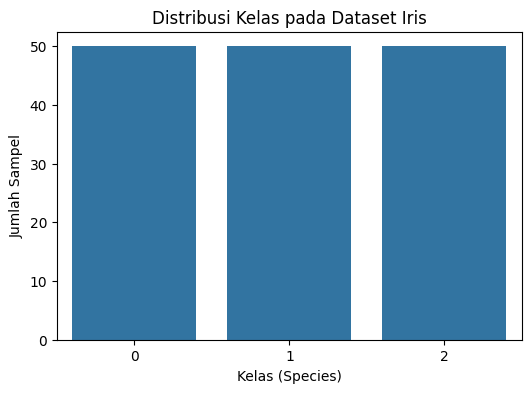

In [231]:
#Distribusi Kelas
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribusi Kelas pada Dataset Iris")
plt.xlabel("Kelas (Species)")
plt.ylabel("Jumlah Sampel")
plt.show()

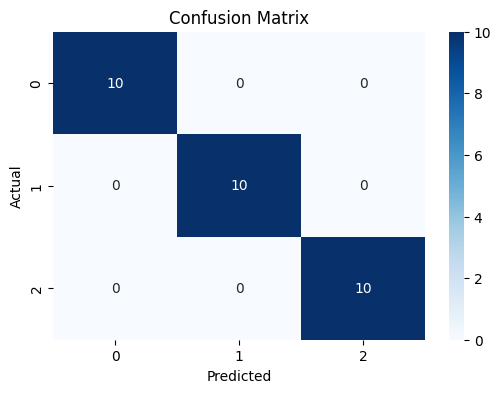

In [232]:
#Confussion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

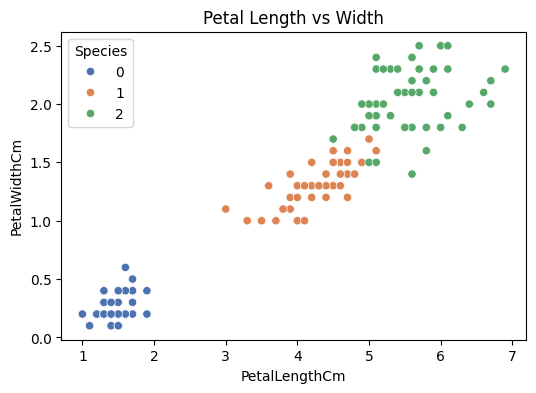

In [233]:
#Visualisasi fitur sederhana
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    palette="deep"
)
plt.title("Petal Length vs Width")
plt.show()